#### Importance Sampling

This is useful when comuting expectations of quantities and when the integral for this expectation is cumbersome. We will figure out how to go about this similar to the example of rejection sampling. Use the following link to get  the youtube tutorial from the same guy https://www.youtube.com/watch?v=ivBtpzHcvpg. 

The trick is to use the Law of Large numbers. In this context this state that the avearge of the results obtained from a large number of trials should be cose to the expected values and will tend to become cloder to the expected value as more and more trials are performed.

$\frac{1}{N}\sum_{n=1}^{N} h(x_i) \approx E_{p}[h(X)]$.

$E_{p}[h(X)] = \int_R h(x)p(x) \,dx$

That said to apply this law, we need to be able to sample from the distribtuion. Why this technique is useful comes from the fact that we cannot sample from $p(x)$, or can sample but the procedure is extremely inefficient. Also assume that $p(x)$ is not normalized, but we can evaluate the density function at a given $x$.

So to sample we use a proxy/proposal distribution to sample $x$'s from. Denote this by $q(x)$.

Now, $E_{p}[h(X)] = \int_R h(x)\frac{q(x)}{q(x)}p(x) \,dx$

$E_{q}[h'(X)] = \int_R h(x)\frac{p(x)}{q(x)} q(x)\,dx$

$\frac{p(x)}{q(x)}$ is called a likelihood ratio or importance weight. 

And the expectation above can be written as follows because of the law of large numbers.

$E_{q}[h'(X)] \approx \frac{1}{N}\sum_{n=1}^{N} h(x_i)\frac{p(x)}{q(x)}$ and $x_i \sim q(x)$

Now how to chose $q$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import seaborn as sns

Let's do an example from here https://medium.com/@amir_masoud/a-simple-tutorial-on-sampling-importance-and-monte-carlo-with-python-codes-8ce809b91465. 

First define the function $h(x)$ as follows.

In [2]:
def h_x(x):
    return 1/(1 + np.exp(-x))

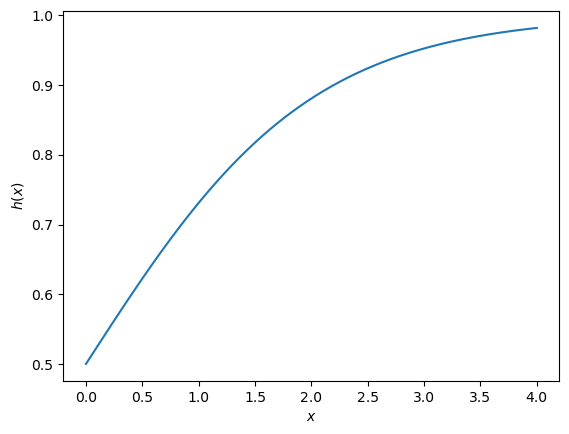

In [3]:
# plot this function
xrange = np.linspace(0,4,500)
h_x_at_xrange = h_x(xrange)

plt.plot(xrange, h_x_at_xrange)
plt.xlabel("$x$")
plt.ylabel("$h(x)$")
plt.show()

suppose we have a p(x) and a q(x) and for simplicity, we will assume both of these are normal.

In [4]:
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

In [5]:
# pre-setting
n = 1000
mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

Define the two functions as below. Idea is that we need to compute the expectation of the function h(x) with respect to p(x), but we cannot directly sample from p(x) to apply law of large numbers, hence we need a function q(x) as proposal function, and we use the derived last formula in the discussion to compute the expectations.

In [6]:
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

/tmp/ipykernel_1483340/3924191239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
/tmp/ipykernel_1483340/3924191239.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_appro, s

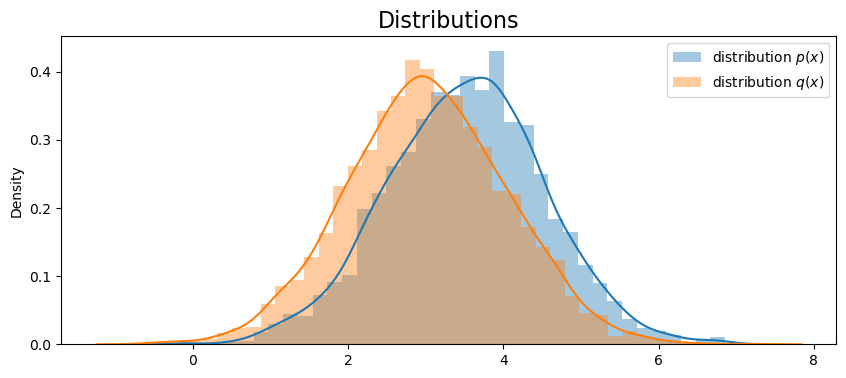

In [7]:
plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()
plt.show()

In [8]:
# Expected value using the true distribution p(x)- with large numbers approximation
s = 0
for i in range(n):
    # draw a sample from p(x)
    x_i = np.random.normal(mu_target, sigma_target)
    # evaluate h(x) at this sample
    s += h_x(x_i)
print("simulate value", s/n)

simulate value 0.9561693285072013


In [9]:
# Expected value using q(x)
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = h_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.9458999197236064 variance 0.30697819945951144


Use a different q(x)

In [10]:
# pre-setting
mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

/tmp/ipykernel_1483340/1955052219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
/tmp/ipykernel_1483340/1955052219.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([np.random.normal(mu_appro, s

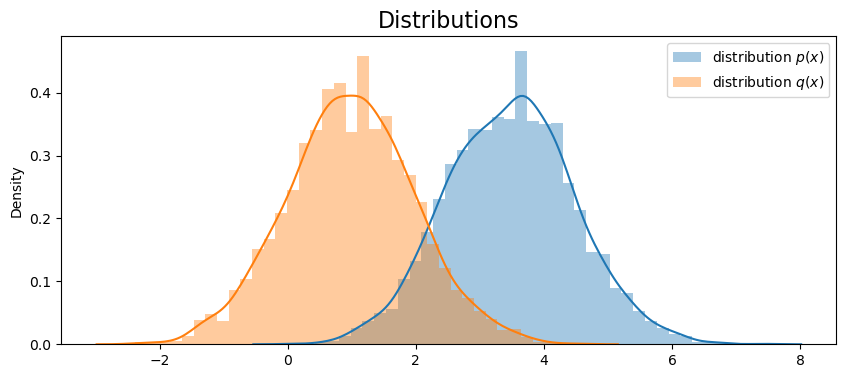

In [11]:
plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [12]:
# calculate value sampling from a different distribution

value_list = []
# need larger steps
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = h_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.5817426329381435 variance 8.604318459281275


Note when q(x) does not properly match with p(x) the variance becomes much large.